<a href="https://colab.research.google.com/github/woogi123/LA2/blob/main/%EA%B8%B0%EB%A7%90_matrix_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
origin2D = np.array([0,0])
origin3D = np.array([0,0,0])
scale = 10

In [ ]:
print(np.array([1,0]))  # (행) 벡터
print(np.hstack([1,0])) # horizontal로 stack 해라
 
print(np.vstack([1,0])) # 열벡터 표현

[1 0]
[1 0]
[[1]
 [0]]


In [ ]:
g = np.vstack([1,0])
b = np.vstack([0,1])
A = np.hstack([g,b])
print("A: ")
print(A, "\n")

print("det(A): ")
print(npl.det(A))

A: 
[[1 0]
 [0 1]] 

det(A): 
1.0


<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=595x842 at 0x7F09B9D28850>
PNG
(595, 842)
RGBA


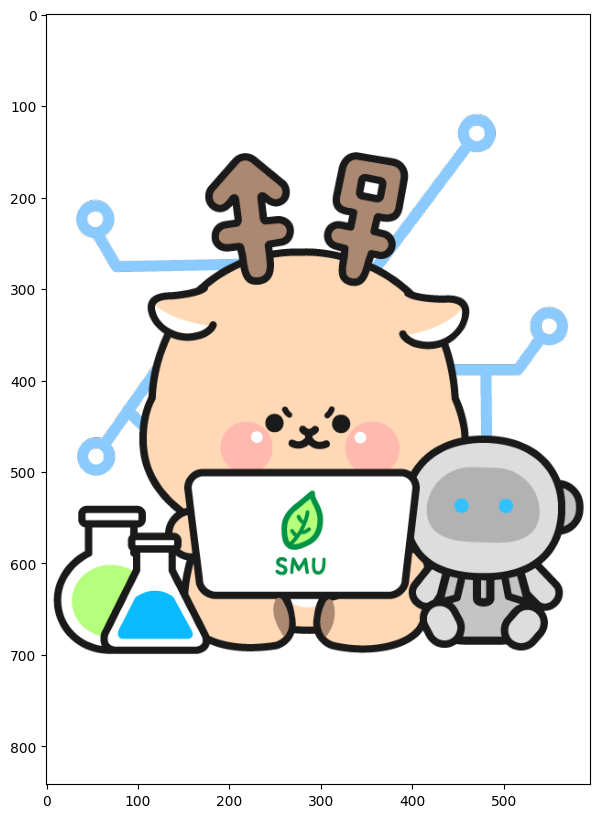

In [45]:
stonehenge = Image.open('smung.ict.png')
print(stonehenge)
print(stonehenge.format)
print(stonehenge.size)
print(stonehenge.mode)

plt.imshow(stonehenge)
plt.show()

In [46]:
imMatrix = np.array(stonehenge.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

(842, 595)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
scalar = 1/2
shape = np.shape(imMatrix)
U,S,V = npl.svd(imMatrix)
if shape[0] > shape[1]:
  Sd = np.hstack([np.eye(shape[1])*S.copy(), np.zeros((shape[1],shape[0]-shape[1]))])
else:
  Sd = np.hstack([np.eye(shape[0])*S.copy(), np.zeros((shape[0],shape[1]-shape[0]))])

print(np.shape(scalar), np.shape(Sd), np.shape(V))

() (595, 842) (595, 595)


In [ ]:
usv = U @ Sd @ V
print(np.allclose(imMatrix,usv))

plt.imshow(usv, cmap='gray')
plt.show()

ValueError: ignored

(842, 1)
(1, 1)
(1, 595)
2 [(842, 595), (842, 842), (595, 842), (595, 595)]
1438 500990 0.002870316772789876


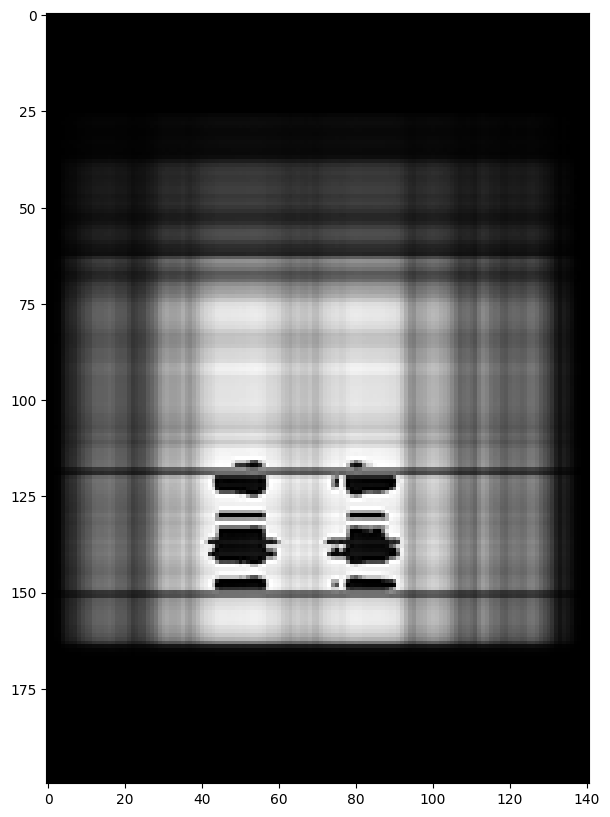

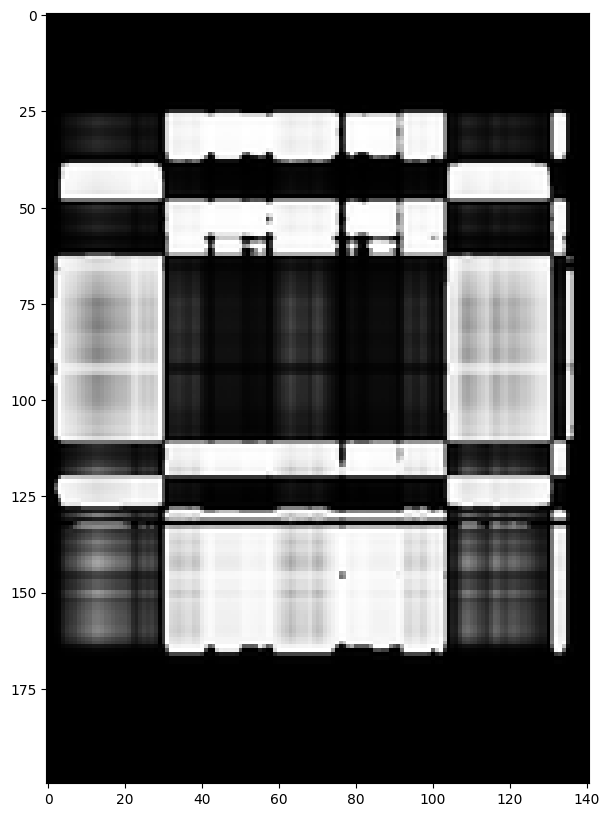

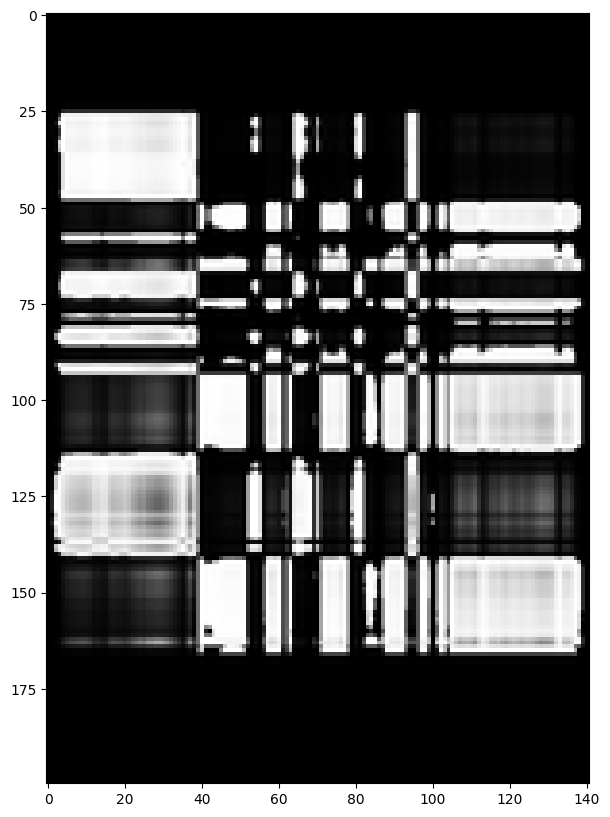

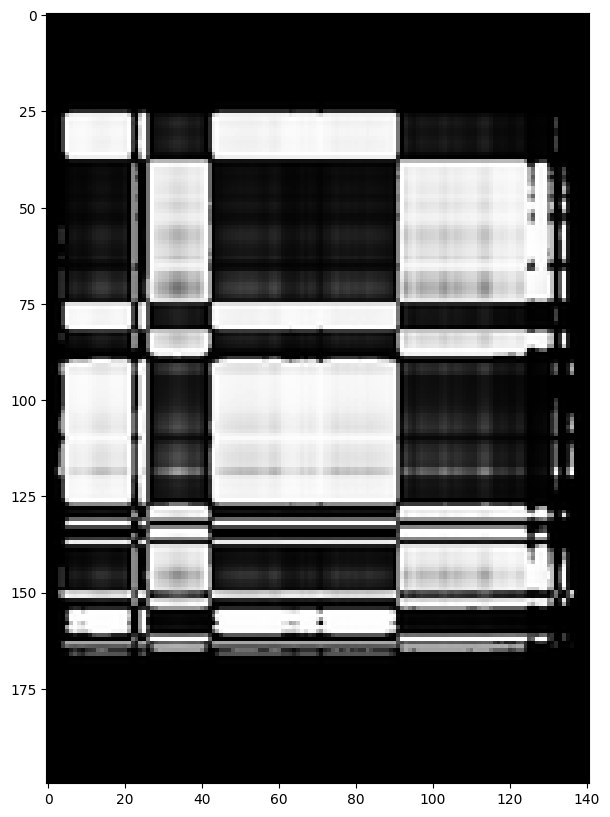

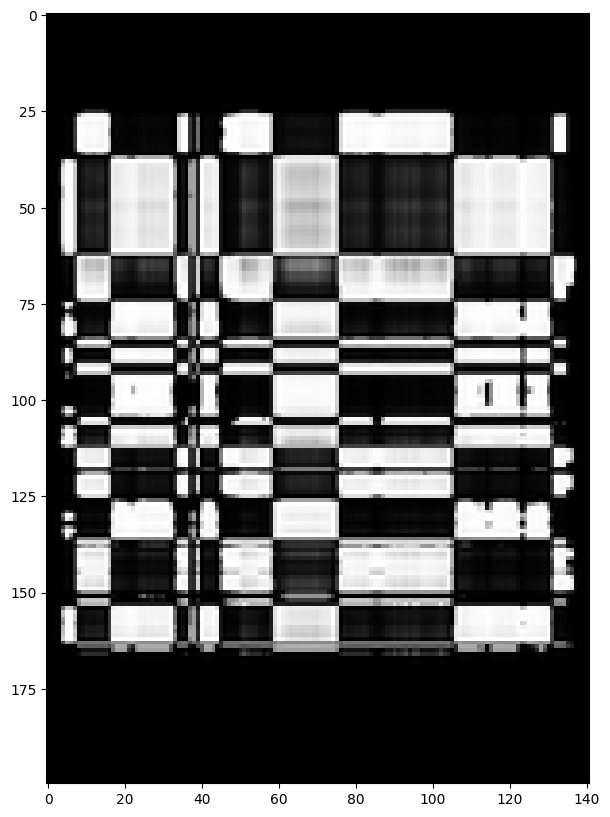

In [48]:
k = 1
print(np.shape(U[:,:k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
print(np.ndim(imMatrix),[np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size = (200,200)
imtemp = lambda k : (np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap='gray')
  plt.show()

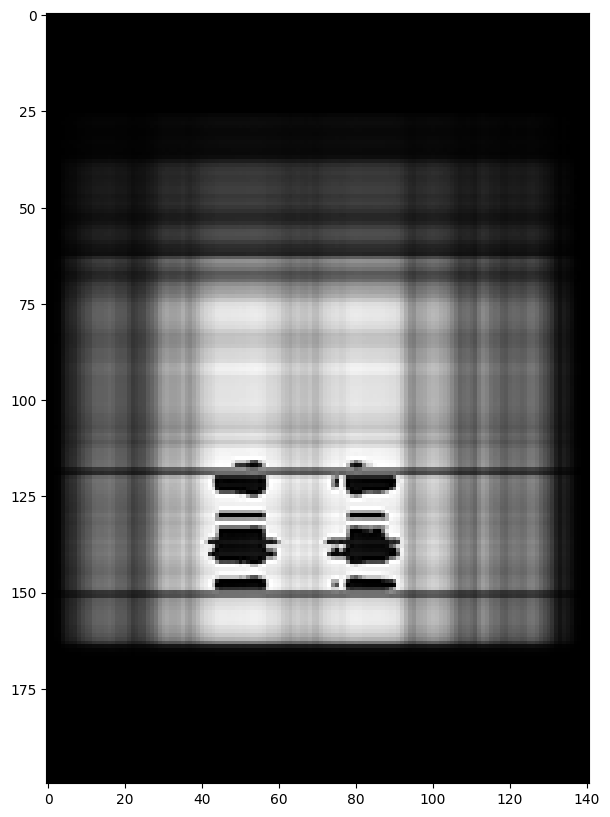

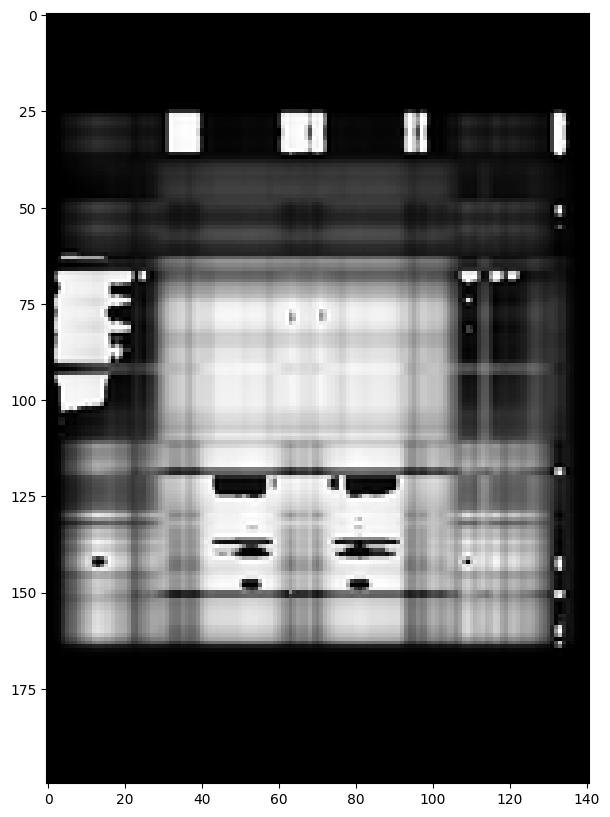

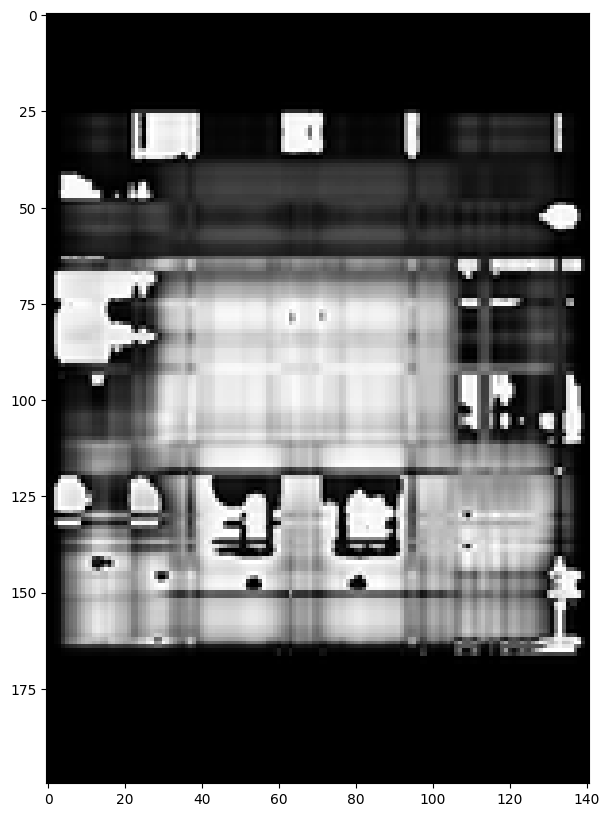

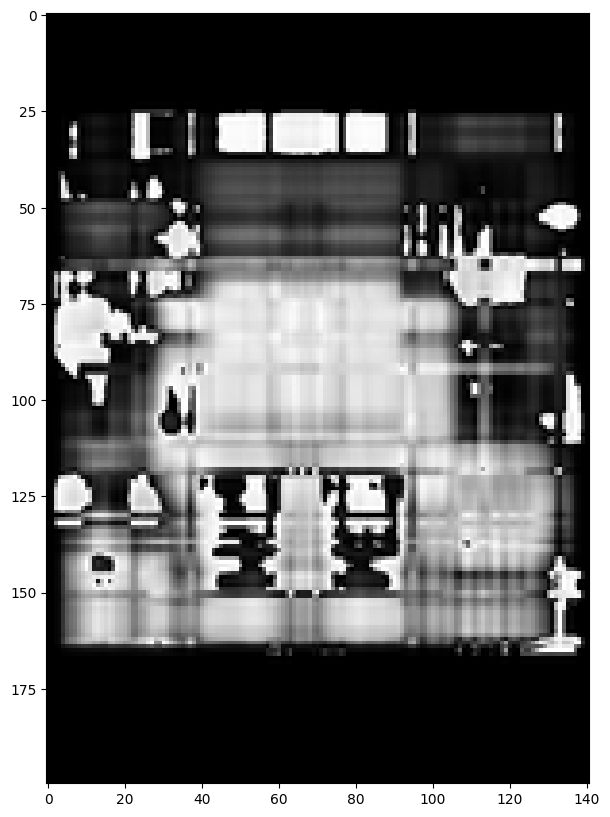

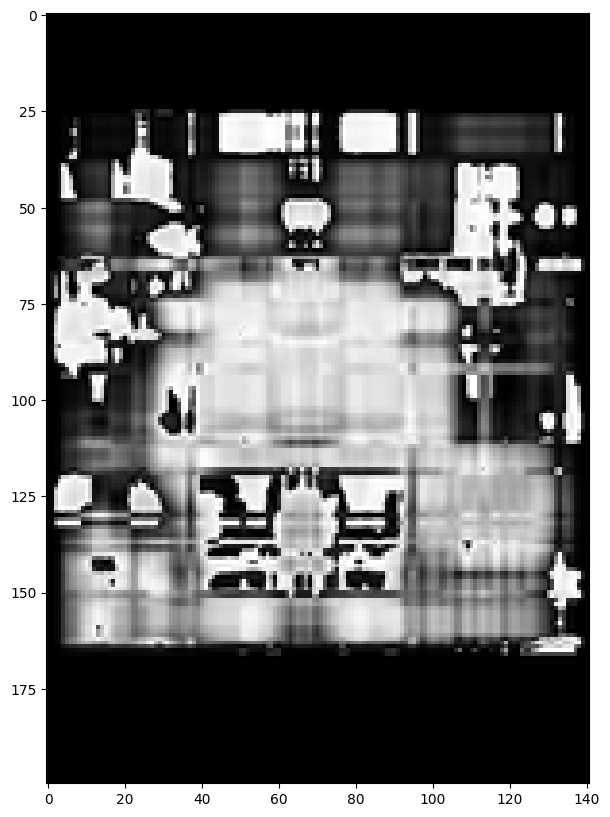

In [49]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]]
partial, total, partial/total

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:,:k].T)*255
for i in list(range(1,k+1)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im,cmap="gray")
  plt.show()

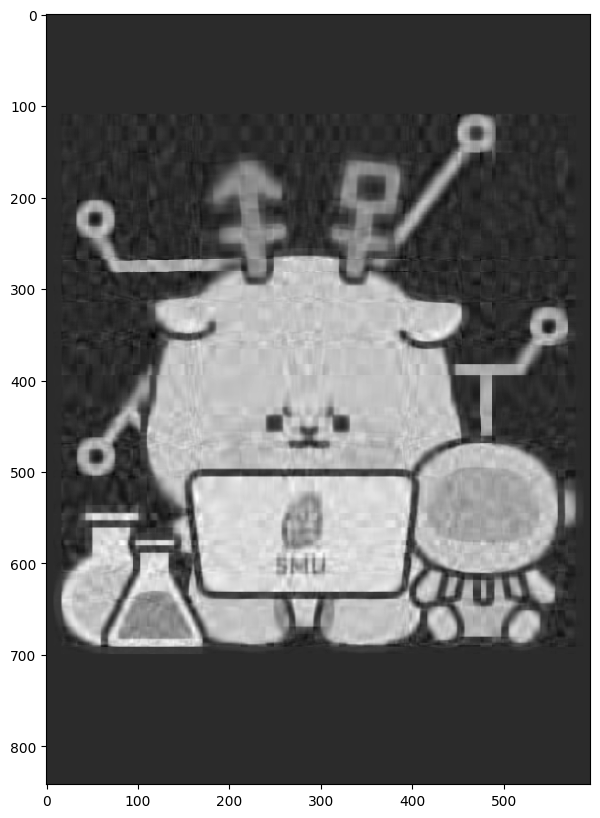

In [50]:
k = 30
im = imtemp(k)
m,n = np.shape(imMatrix)
partial, total = (k*(m+n)+k, m*n)
partial, total , partial/total

plt.imshow(im, cmap='gray')
plt.show()